In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from torch import nn
from torch import optim


In [2]:
print(torch.randn(1,2))

tensor([[ 2.2968, -0.2398]])


In [3]:
x = torch.randn(5,8)
print(x)
print(x.dim())

tensor([[ 0.1004, -0.6261,  0.5466,  1.1468, -0.2483, -0.0683, -0.7666,  0.6818],
        [-0.3408, -1.7969, -0.3226, -0.3678, -0.9196,  0.5887,  1.2172, -0.1010],
        [-0.3132, -1.8846,  0.3217,  0.1731, -0.1272,  0.3062,  1.2866,  2.4622],
        [-0.4119, -1.0705, -1.7969,  1.3462, -0.0544, -1.0878, -0.3245,  0.1988],
        [-1.1119, -0.7201, -0.4491,  2.4938, -0.1184, -0.2442,  0.6109,  1.3889]])
2


In [4]:
t1 = np.arange(24)
t1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [5]:
t1 = t1.reshape(2,3,4)
t1

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [6]:
t1 = torch.tensor(t1)

In [7]:
t1

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]], dtype=torch.int32)

In [8]:
t1.transpose(0,1)
# 进行两个维度之间的交换

tensor([[[ 0,  1,  2,  3],
         [12, 13, 14, 15]],

        [[ 4,  5,  6,  7],
         [16, 17, 18, 19]],

        [[ 8,  9, 10, 11],
         [20, 21, 22, 23]]], dtype=torch.int32)

In [9]:
# 按照原来的不变
t1.permute(0,1,2)
# 交换会最初的样子
t1.permute(1,0,2)
t1

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]], dtype=torch.int32)

In [10]:
t2 = torch.tensor([1,2],dtype=torch.long)

In [11]:
t3 = torch.Tensor([1,2])
t3
# Tensor是创建一个矩阵变量，tensor是具体实例

tensor([1., 2.])

In [12]:
torch.Tensor(3,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [13]:
torch.Tensor([3,3])

tensor([3., 3.])

In [14]:
torch.zeros(3,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [15]:
torch.zeros([3,3])

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [25]:
x = torch.ones(2,2,requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [26]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [28]:
z = y * y * 3
out = z.mean()
out

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)


tensor(27., grad_fn=<MeanBackward0>)

In [19]:
out.backward()
# 因为out是一个标量，所以可以直接backward

In [20]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

当z向量对x求导时，需要在backward中添加参数，但是一般反向传播都是损失函数对变量求导
损失函数都是一个数，即标量


如果要循环进行几次反向传播，因为每次反向传播会将梯度累加，所以每次反向传播前得将梯度置0

 tensor.data：获取tensor中的数据
 当required_grad=True时，就只带数据，不带属性
 一般要深拷贝的时候，tensor.detach().numpy()，需要使用detach将tensor抽离出来，然后深拷贝为numpy类型

tensor([[0.3001]]) tensor(7.9999) tensor(9.3335e-10)


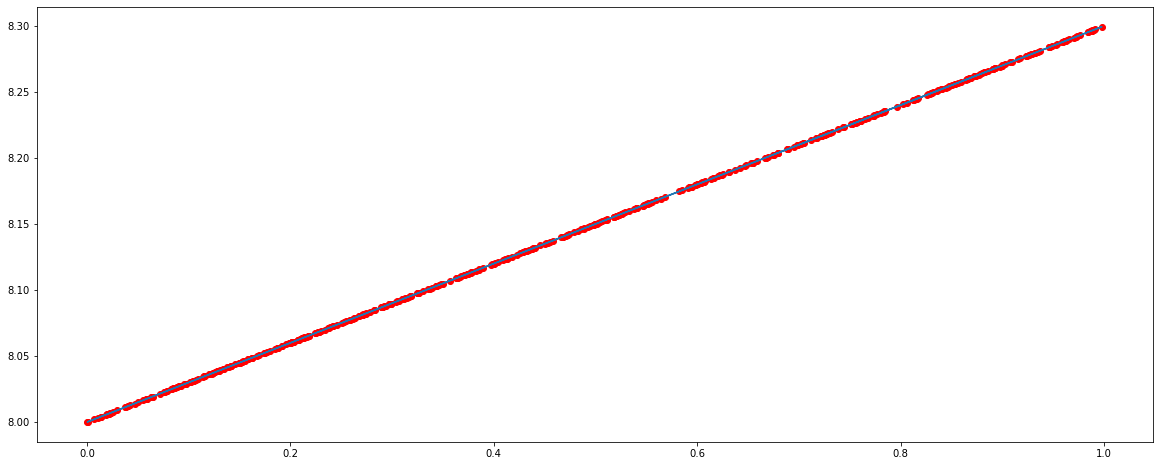

In [21]:
# 做个简单的线性回归

learning_rate = 0.01

x = torch.rand([500,1])
y_true = 0.3 * x + 8

w = torch.rand([1,1],requires_grad=True)
b = torch.tensor(0,requires_grad=True,dtype=torch.float)

y_predict = torch.matmul(x,w) + b

for i in range(50000):
    
    y_predict = torch.matmul(x,w) + b
    loss = (y_true - y_predict).pow(2).mean()
    if w.grad is not None:
        w.data.zero_()
    if b.grad is not None:
        b.data.zero_()
    
    loss.backward()
    w.data = w.data - learning_rate * w.grad
    b.data = b.data - learning_rate * b.grad
    
print(w.data,b.data,loss.data)
    
plt.figure(figsize=(20,8))
plt.plot(x.numpy().reshape(-1),y_true.detach().view(-1))
plt.scatter(x.numpy().reshape(-1),y_predict.detach().view(-1),c='r')
plt.show()
    

2.3536763191223145 0.4534713625907898 0.7719942927360535
2.3432085514068604 0.4552822709083557 0.7746680378913879
2.3327934741973877 0.4570891559123993 0.7773345708847046
2.3224313259124756 0.4588920474052429 0.7799938917160034
2.312122106552124 0.4606909453868866 0.7826460599899292
2.301865339279175 0.4624858498573303 0.7852910757064819
2.2916603088378906 0.4642767906188965 0.7879289388656616
2.2815074920654297 0.4660637676715851 0.790559709072113
2.2714061737060547 0.4678467810153961 0.7931833267211914
2.2613563537597656 0.469625860452652 0.7957999110221863
2.2513575553894043 0.47140100598335266 0.7984094023704529
2.2414097785949707 0.47317221760749817 0.801011860370636
2.2315123081207275 0.4749395251274109 0.8036072850227356
2.221665382385254 0.4767029285430908 0.8061957359313965
2.2118680477142334 0.47846242785453796 0.8087771534919739
2.2021212577819824 0.4802180528640747 0.8113515973091125
2.1924233436584473 0.48196980357170105 0.8139191269874573
2.1827750205993652 0.483717679977

0.41431865096092224 1.0391290187835693 1.5181821584701538
0.41357848048210144 1.0397629737854004 1.5187615156173706
0.4128417670726776 1.040395975112915 1.5193389654159546
0.41210851073265076 1.0410279035568237 1.5199146270751953
0.4113785922527313 1.0416587591171265 1.5204885005950928
0.41065213084220886 1.0422886610031128 1.521060585975647
0.4099288880825043 1.0429174900054932 1.521630883216858
0.4092090427875519 1.0435452461242676 1.5221993923187256
0.4084925651550293 1.0441720485687256 1.52276611328125
0.407779335975647 1.0447977781295776 1.5233310461044312
0.4070693850517273 1.0454225540161133 1.523894190788269
0.40636271238327026 1.046046257019043 1.5244556665420532
0.4056592881679535 1.0466690063476562 1.5250153541564941
0.4049590826034546 1.0472906827926636 1.5255732536315918
0.40426215529441833 1.0479114055633545 1.5261293649673462
0.4035683572292328 1.0485310554504395 1.5266838073730469
0.4028777778148651 1.049149751663208 1.5272364616394043
0.40219035744667053 1.049767494201

0.2498573362827301 1.2943129539489746 1.6591858863830566
0.24975955486297607 1.2946233749389648 1.6592209339141846
0.24966198205947876 1.294933557510376 1.6592555046081543
0.24956460297107697 1.295243501663208 1.6592897176742554
0.2494674026966095 1.295553207397461 1.6593235731124878
0.24937039613723755 1.2958626747131348 1.6593570709228516
0.24927353858947754 1.2961719036102295 1.6593900918960571
0.24917687475681305 1.2964808940887451 1.659422755241394
0.24908038973808289 1.2967896461486816 1.6594550609588623
0.24898408353328705 1.297098159790039 1.659487009048462
0.24888794124126434 1.2974064350128174 1.6595184803009033
0.24879196286201477 1.297714352607727 1.659549593925476
0.2486962080001831 1.2980220317840576 1.6595803499221802
0.24860063195228577 1.298329472541809 1.6596107482910156
0.24850521981716156 1.2986366748809814 1.6596407890319824
0.24840997159481049 1.2989436388015747 1.6596704721450806
0.24831490218639374 1.2992503643035889 1.6596996784210205
0.24822001159191132 1.2995

0.20941069722175598 1.4430263042449951 1.6389950513839722
0.20935308933258057 1.443253517150879 1.6389175653457642
0.20929546654224396 1.4434806108474731 1.6388399600982666
0.20923787355422974 1.4437075853347778 1.638762354850769
0.2091803401708603 1.4439345598220825 1.638684630393982
0.20912280678749084 1.4441614151000977 1.6386067867279053
0.2090652883052826 1.4443881511688232 1.6385289430618286
0.20900781452655792 1.4446148872375488 1.6384509801864624
0.20889291167259216 1.4450680017471313 1.6382948160171509
0.20883551239967346 1.4452944993972778 1.6382166147232056
0.20877811312675476 1.4455208778381348 1.6381382942199707
0.20872071385383606 1.4457471370697021 1.6380599737167358
0.20866340398788452 1.4459733963012695 1.6379815340042114
0.2086060792207718 1.4461995363235474 1.6379029750823975
0.20854876935482025 1.4464255571365356 1.6378244161605835
0.2084915041923523 1.446651577949524 1.63774573802948
0.20843423902988434 1.4468774795532227 1.6376670598983765
0.20837703347206116 1.44

0.18137729167938232 1.5551968812942505 1.5910409688949585
0.1813286989927292 1.5553948879241943 1.5909440517425537
0.18128010630607605 1.5555927753448486 1.590847134590149
0.1812315732240677 1.555790662765503 1.5907502174377441
0.18118299543857574 1.5559885501861572 1.5906533002853394
0.18113446235656738 1.556186318397522 1.5905563831329346
0.1810859739780426 1.5563840866088867 1.5904594659805298
0.18103745579719543 1.5565818548202515 1.590362548828125
0.18098895251750946 1.5567795038223267 1.5902656316757202
0.18094050884246826 1.5569771528244019 1.5901687145233154
0.18089205026626587 1.557174801826477 1.590071678161621
0.1808435618877411 1.5573723316192627 1.5899746417999268
0.18079513311386108 1.5575698614120483 1.5898776054382324
0.18074670433998108 1.557767391204834 1.589780569076538
0.18069827556610107 1.55796480178833 1.5896835327148438
0.18064990639686584 1.5581622123718262 1.5895864963531494
0.18060152232646942 1.5583596229553223 1.589489459991455
0.1805531531572342 1.55855691

0.15651850402355194 1.65914785861969 1.5373672246932983
0.1564766764640808 1.6593282222747803 1.5372707843780518
0.15643486380577087 1.6595085859298706 1.5371743440628052
0.15639303624629974 1.659688949584961 1.5370779037475586
0.1563512086868286 1.6598691940307617 1.536981463432312
0.15630939602851868 1.6600494384765625 1.536885142326355
0.15626764297485352 1.6602296829223633 1.536788821220398
0.15622586011886597 1.660409927368164 1.536692500114441
0.1561841070652008 1.6605901718139648 1.5365961790084839
0.15614236891269684 1.660770297050476 1.5364998579025269
0.15610063076019287 1.6609504222869873 1.5364035367965698
0.1560589075088501 1.6611305475234985 1.5363072156906128
0.15601718425750732 1.6613106727600098 1.5362108945846558
0.15597546100616455 1.6614906787872314 1.5361145734786987
0.15593376755714417 1.6616706848144531 1.5360182523727417
0.15589210391044617 1.6618506908416748 1.5359219312667847
0.15585044026374817 1.6620306968688965 1.5358256101608276
0.15580876171588898 1.66221

0.1350090354681015 1.7550129890441895 1.4854375123977661
0.13497294485569 1.7551796436309814 1.4853464365005493
0.1349368691444397 1.7553462982177734 1.4852553606033325
0.13490082323551178 1.7555129528045654 1.4851642847061157
0.13486474752426147 1.7556796073913574 1.485073208808899
0.13482870161533356 1.7558461427688599 1.4849821329116821
0.13479267060756683 1.7560126781463623 1.4848910570144653
0.1347566395998001 1.7561792135238647 1.4847999811172485
0.1347206085920334 1.7563457489013672 1.4847090244293213
0.13468460738658905 1.7565122842788696 1.484618067741394
0.13464860618114471 1.7566787004470825 1.4845271110534668
0.13461261987686157 1.7568451166152954 1.4844361543655396
0.13457666337490082 1.7570115327835083 1.4843451976776123
0.13454067707061768 1.7571779489517212 1.484254240989685
0.13450472056865692 1.757344365119934 1.4841632843017578
0.13446876406669617 1.7575106620788574 1.4840723276138306
0.1344328373670578 1.7576769590377808 1.4839813709259033
0.13439691066741943 1.7578

0.11664322018623352 1.8428672552108765 1.4372584819793701
0.11661206930875778 1.8430219888687134 1.4371734857559204
0.11658088862895966 1.8431767225265503 1.4370884895324707
0.11654973775148392 1.8433314561843872 1.437003493309021
0.11651857197284698 1.8434860706329346 1.4369184970855713
0.11648742854595184 1.843640685081482 1.4368335008621216
0.1164563000202179 1.8437952995300293 1.4367485046386719
0.11642517894506454 1.8439499139785767 1.4366635084152222
0.1163940504193306 1.844104528427124 1.4365785121917725
0.11636294424533844 1.8442590236663818 1.4364935159683228
0.11633183062076569 1.8444135189056396 1.436408519744873
0.11630074679851532 1.8445680141448975 1.436323642730713
0.11626967042684555 1.8447225093841553 1.4362387657165527
0.11623859405517578 1.844877004623413 1.4361538887023926
0.11620752513408661 1.845031499862671 1.4360690116882324
0.11617647111415863 1.8451858758926392 1.4359841346740723
0.11614541709423065 1.8453402519226074 1.435899257659912
0.11611437052488327 1.84

0.09973067045211792 1.9300596714019775 1.3892874717712402
0.09970399737358093 1.9302027225494385 1.3892087936401367
0.09967735409736633 1.9303457736968994 1.3891301155090332
0.09965070337057114 1.9304887056350708 1.3890514373779297
0.09962407499551773 1.9306316375732422 1.3889727592468262
0.09959744662046432 1.9307745695114136 1.3888940811157227
0.09957084059715271 1.930917501449585 1.3888154029846191
0.0995442122220993 1.9310604333877563 1.3887367248535156
0.09951760619878769 1.9312033653259277 1.388658046722412
0.09949100017547607 1.9313461780548096 1.3885793685913086
0.09946440905332565 1.9314889907836914 1.388500690460205
0.09943782538175583 1.9316318035125732 1.3884220123291016
0.0994112491607666 1.931774616241455 1.3883434534072876
0.09938467293977737 1.931917428970337 1.3882648944854736
0.09935811161994934 1.9320602416992188 1.3881863355636597
0.09933154284954071 1.932202935218811 1.3881077766418457
0.09930501878261566 1.9323456287384033 1.3880292177200317
0.09927847236394882 1.

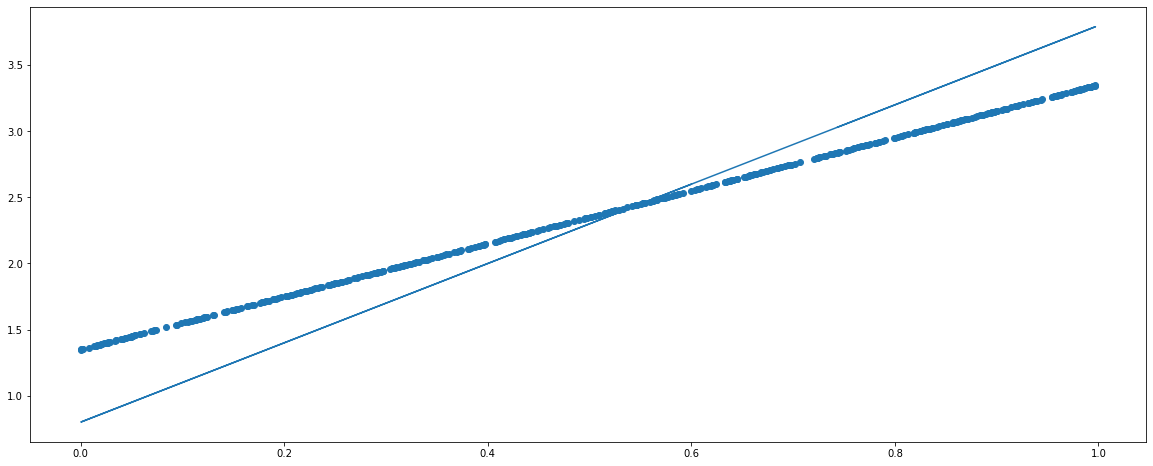

In [22]:
# 用torch自带的module构建模型
x = torch.rand(500,1)
y_true = 3 * x + 0.8

class Lr(nn.Module):
    def __init__(self):
        super(Lr,self).__init__()
        # 前面那个参数是输入的特征数量（列，不是输入数据的数量），第二个是输出特征数量
        self.linear = nn.Linear(1,1)
        
    def forward(self,x):
        out = self.linear(x)
        return out

model = Lr()

# 优化器类 optimizer，都是由torch.optim提供，实例化loss
optimizer = optim.SGD(model.parameters(),1e-3)
criterion = nn.MSELoss()

for i in range(5000):
    # 预测y
    y_predict = model(x)
    # 计算损失
    loss = criterion(y_true,y_predict)
    # 梯度置0
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 更新参数
    optimizer.step()

    if i % 100:
        params = list(model.parameters())
        print(loss.item(), params[0].item(),params[1].item())










plt.figure(figsize=(20,8))
plt.plot(x.detach().view(-1),y_true.detach().view(-1))
plt.scatter(x.detach().view(-1),y_predict.detach().view(-1))
plt.show()

In [ ]:
# 用判断有没有gpu，有就用gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x = torch.rand(500,1).to(device)
y_true = 3 * x + 0.8

class Lr(nn.Module):
    def __init__(self):
        super(Lr,self).__init__()
        # 前面那个参数是输入的特征数量（列，不是输入数据的数量），第二个是输出特征数量
        self.linear = nn.Linear(1,1)
        
    def forward(self,x):
        out = self.linear(x)
        return out

model = Lr().to(device)

# 优化器类 optimizer，都是由torch.optim提供，实例化loss
optimizer = optim.SGD(model.parameters(),1e-3)
criterion = nn.MSELoss()

for i in range(5000):
    # 预测y
    y_predict = model(x)
    # 计算损失
    loss = criterion(y_true,y_predict)
    # 梯度置0
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 更新参数
    optimizer.step()

    if i % 100:
        params = list(model.parameters())
        print(loss.item(), params[0].item(),params[1].item())








 

plt.figure(figsize=(20,8))
plt.plot(x.detach().view(-1),y_true.detach().view(-1))
plt.scatter(x.detach().view(-1),y_predict.detach().view(-1))
plt.show()

在GPU上执行，需要自定义参数和数据转化为cuda支持的tensor
model也需要转化为cuda
用to操作

 接下来是手写数字识别的实践


In [37]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import Compose,ToTensor,Normalize

### 1、准备数据集

In [41]:
transform_fn = Compose({
    # 换成tensor类型，和正态标准化
    ToTensor(),
    Normalize(mean=(0.1307,),std=(0.3081,))# 这里的数量和通道数相同
})

dataset = MNIST(root="./data",train=True,transform=transform_fn)
data_loader = DataLoader(dataset,batch_size=2,shuffle=True)

# for i in enumerate(data_loader):
#     print(i)